In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

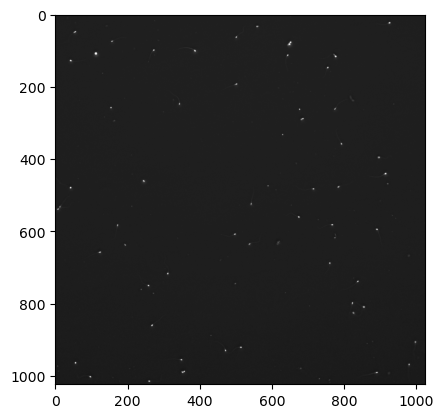

In [ ]:
#videofile = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1.mp4"
#videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1.mp4"
videofile = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1.mp4"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [8]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

Frame 263: 60 trajectories present.
            y           x         mass      size       ecc      signal  \
0   23.951893  925.333644  2020.158690  1.872404  0.196102  143.580490   
1  618.730616  774.236581   630.750975  1.642199  0.231269   65.833849   
2  632.150327  617.303105   767.434586  2.786962  0.278718   35.738375   
3  638.534584  193.690504  1069.643304  1.814039  0.229937   96.556312   
4  658.798808  123.843673  1788.799734  1.961780  0.316804  133.548666   

   raw_mass        ep  frame  sperm  
0    6236.0  0.005850      0      0  
1    3465.0  0.023164      0      5  
2    4159.0  0.013303      0      6  
3    4239.0  0.012681      0      8  
4    5683.0  0.006876      0      9  


In [9]:
importlib.reload(tracker)

compute_segments = False
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

            y           x         mass      size       ecc      signal  \
0   23.951893  925.333644  2020.158690  1.872404  0.196102  143.580490   
1  618.730616  774.236581   630.750975  1.642199  0.231269   65.833849   
2  632.150327  617.303105   767.434586  2.786962  0.278718   35.738375   
3  638.534584  193.690504  1069.643304  1.814039  0.229937   96.556312   
4  658.798808  123.843673  1788.799734  1.961780  0.316804  133.548666   

   raw_mass        ep  frame  sperm  
0    6236.0  0.005850      0      0  
1    3465.0  0.023164      0      5  
2    4159.0  0.013303      0      6  
3    4239.0  0.012681      0      8  
4    5683.0  0.006876      0      9  


In [10]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.calcAverageSpeed(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [ ]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="segments")